# Term project (MNIST visualization)
## Objective
    •Deep neural network 구현 및 Visualization  
    •Visualization을 통한 Neural network에 대한 이해 향상

In [1]:
import torch
from torch import nn, optim
import torchvision
from torchvision import datasets, transforms
from torch.nn import ModuleList

from __future__ import print_function
import time
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

In [2]:
batch_size = 12

train_data = datasets.MNIST('', train=True, transform = transforms.ToTensor())
test_data = datasets.MNIST('', train=False, transform = transforms.ToTensor())
train_loader = torch.utils.data.DataLoader(train_data, batch_size = batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size = batch_size)

print(train_loader.dataset.data.shape)
print(test_loader.dataset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


In [3]:
x = train_data.data.reshape(-1, 784)/255.0
y = train_data.targets
print(x.shape)
print(y.shape)

torch.Size([60000, 784])
torch.Size([60000])


In [4]:
feat_cols= [f'pixel{i}' for i in range(28*28)]
df = pd.DataFrame(x.numpy(), columns=feat_cols)
df['y'] = y.numpy()
df

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  \
0         0.0  ...       0.0       0.0       0.0       0.0       0.0   
1         0.0  ...       0.0       0.0       0.0       0.0       0.0   
2         0.0  ...       0.0       0.0       0.0       0.0       0.0   
3         0.0  ...       0.0       0.0       0.0       0.0       0.0   
4         0.0  ...       0.0       0.0       0.0       0.0       0.0   
...       ...  ...       ...       ...       ...       ...       ...   
59995     0.0  ...       0.0       0.0       0.0       0.0       0.0   
59996     0.0  ...       0.0       0.0       0.0       0.0       0.0   
59997     0.0  ...       0.0       0.0       0.0       0.0       0.0   
59998     0.0  ...       0.0       0.0       0.0       0.0       0.0   
59999     0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel780  pixel781  pixel782  pixel783  y  
0           0.0       0.0       0.0       0.0  5  
1           0.0       0.0       0.0       0.0  0  
2           0.0       0.0       0.0       0.0  4  
3           0.0       0.0       0.0       0.0  1  
4           0.0       0.0       0.0       0.0  9  
...         ...       ...       ...       ... ..  
59995       0.0       0.0       0.0       0.0  8  
59996       0.0       0.0       0.0       0.0  3  
59997       0.0       0.0       0.0       0.0  5  
59998       0.0       0.0       0.0       0.0  6  
59999       0.0       0.0       0.0       0.0  8  

[60000 rows x 785 columns]

# Input vector PCA and t-SNC


In [5]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:, 0]
df['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
df

Explained variation per principal component: [0.09704711 0.07095966]


pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
1         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
3         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
4         0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
59995     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59996     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59997     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59998     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
59999     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   

       pixel9  ...  pixel777  pixel778  pixel779  pixel780  pixel781  \
0         0.0  ...       0.0       0.0       0.0       0.0       0.0   
1         0.0  ...       0.0       0.0       0.0       0.0       0.0   
2         0.0  ...       0.0       0.0       0.0       0.0       0.0   
3         0.0  ...       0.0       0.0       0.0       0.0       0.0   
4         0.0  ...       0.0       0.0       0.0       0.0       0.0   
...       ...  ...       ...       ...       ...       ...       ...   
59995     0.0  ...       0.0       0.0       0.0       0.0       0.0   
59996     0.0  ...       0.0       0.0       0.0       0.0       0.0   
59997     0.0  ...       0.0       0.0       0.0       0.0       0.0   
59998     0.0  ...       0.0       0.0       0.0       0.0       0.0   
59999     0.0  ...       0.0       0.0       0.0       0.0       0.0   

       pixel782  pixel783  y   pca-one   pca-two  
0           0.0       0.0  5  0.485964 -1.226136  
1           0.0       0.0  0  3.967459 -1.156278  
2           0.0       0.0  4 -0.203374  1.537964  
3           0.0       0.0  1 -3.133871 -2.381141  
4           0.0       0.0  9 -1.501062  2.864830  
...         ...       ... ..       ...       ...  
59995       0.0       0.0  8 -0.390718 -1.150914  
59996       0.0       0.0  3  0.599013 -2.697634  
59997       0.0       0.0  5 -0.698286  0.627728  
59998       0.0       0.0  6  0.512123 -0.021966  
59999       0.0       0.0  8 -0.680192 -0.096980  

[60000 rows x 787 columns]

In [6]:
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])
rndperm

N =10000
df_subset = df.loc[rndperm[:N], :].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:, 0]
df_subset['pca-two'] = pca_result[:, 1]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Explained variation per principal component: [0.09614986 0.07138532]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.007s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.997s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.136576
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.772041
[t-SNE] KL divergence after 300 iterations: 2.827663
t-SNE done! Time elapsed: 14.13425898551941 seconds


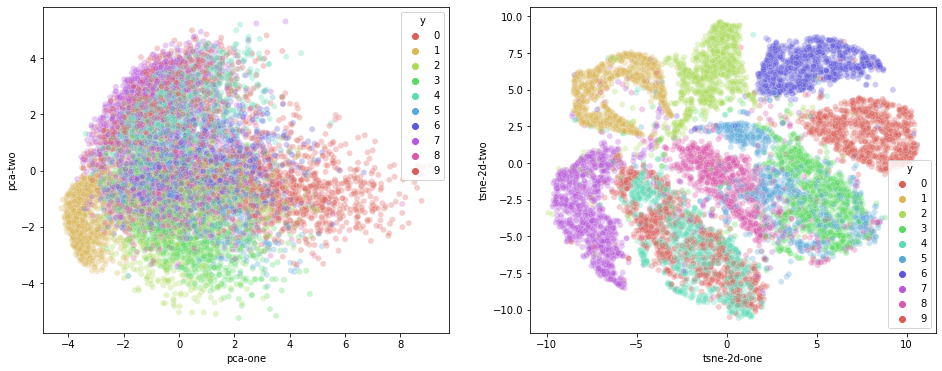

In [7]:
plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", as_cmap = True),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)
plt.show()

# Model

In [8]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.in_dim = 28*28
        self.out_dim = 10
        
        self.fc1 = nn.Linear(self.in_dim, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, self.out_dim)
        
        self.relu = nn.ReLU()
        self.log_softmax = nn.LogSoftmax()
    
    def forward(self, x):
        
        a0 = self.fc1(x.view(-1, self.in_dim))
        z1 = self.relu(a0)
        a1 = self.fc2(z1)
        z2 = self.relu(a1)
        a2 = self.fc3(z2)
        z3 = self.relu(a2)
        a3 = self.fc4(z3)
        z4 = self.relu(a3)        
        logit = self.fc5(z4)

        return logit, (z1, a1, z2, a2, z3, a3, z4)

# Train

In [9]:
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = 0.01)

In [10]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        
        outputs, (z1, a1, z2, a2, z3, a3, z4) = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss+=loss.item()
        if (i+1)%2000 == 0:
            print('[%d, %5d] loss: %.3f' %(epoch+1, i+1, running_loss/2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.202
[1,  4000] loss: 0.742
[2,  2000] loss: 0.304
[2,  4000] loss: 0.233
[3,  2000] loss: 0.152
[3,  4000] loss: 0.140
[4,  2000] loss: 0.106
[4,  4000] loss: 0.099
[5,  2000] loss: 0.073
[5,  4000] loss: 0.077
[6,  2000] loss: 0.056
[6,  4000] loss: 0.061
[7,  2000] loss: 0.043
[7,  4000] loss: 0.047
[8,  2000] loss: 0.035
[8,  4000] loss: 0.040
[9,  2000] loss: 0.027
[9,  4000] loss: 0.031
[10,  2000] loss: 0.020
[10,  4000] loss: 0.027
Finished Training


# Train Dataset - Hidden layer PCA and t-SNE

In [11]:
print('shape of z1:', z1.shape)
print('shape of a1:', a1.shape)
print('shape of z2:', z2.shape)
print('shape of a2:', a2.shape)
print('shape of z3:', z3.shape)
print('shape of a3:', a3.shape)
print('shape of z4:', z4.shape)
print('shape of outputs:', outputs.shape)

shape of z1: torch.Size([12, 512])
shape of a1: torch.Size([12, 256])
shape of z2: torch.Size([12, 256])
shape of a2: torch.Size([12, 128])
shape of z3: torch.Size([12, 128])
shape of a3: torch.Size([12, 64])
shape of z4: torch.Size([12, 64])
shape of outputs: torch.Size([12, 10])


In [12]:
concated_z1 = torch.empty(0, 512)
concated_a1 = torch.empty(0, 256)
concated_z2 = torch.empty(0, 256)
concated_a2 = torch.empty(0, 128)
concated_z3 = torch.empty(0, 128)
concated_a3 = torch.empty(0, 64)
concated_z4 = torch.empty(0, 64)
concated_label = torch.empty(0)

for data in train_loader:
    inputs, labels = data
    outputs, (z1, a1, z2, a2, z3, a3, z4) = model(inputs)
    
    concated_z1 = torch.cat((concated_z1, z1), 0)
    concated_a1 = torch.cat((concated_a1, a1), 0)
    concated_z2 = torch.cat((concated_z2, z2), 0)
    concated_a2 = torch.cat((concated_a2, a2), 0)
    concated_z3 = torch.cat((concated_z3, z3), 0)
    concated_a3 = torch.cat((concated_a3, a3), 0)
    concated_z4 = torch.cat((concated_z4, z4), 0)
    concated_label = torch.cat((concated_label, labels), 0)

In [13]:
print('shape of concated z1:', concated_z1.shape)
print('shape of concated a1:', concated_a1.shape)
print('shape of concated z2:',concated_z2.shape)
print('shape of concated a2:',concated_a2.shape)
print('shape of concated z3:',concated_z3.shape)
print('shape of concated a3:',concated_a3.shape)
print('shape of concated z4:',concated_z4.shape)
print('shape of concated label:',concated_label.shape)

shape of concated z1: torch.Size([60000, 512])
shape of concated a1: torch.Size([60000, 256])
shape of concated z2: torch.Size([60000, 256])
shape of concated a2: torch.Size([60000, 128])
shape of concated z3: torch.Size([60000, 128])
shape of concated a3: torch.Size([60000, 64])
shape of concated z4: torch.Size([60000, 64])
shape of concated label: torch.Size([60000])


In [14]:
concated_label

tensor([4., 9., 9.,  ..., 1., 3., 7.])

In [15]:
def pca_and_tsne(layer, condated_hidden_layer):
    
    # dataframe 생성
    feat_cols= [f'pixel{i}' for i in range(layer)]
    df = pd.DataFrame(condated_hidden_layer.detach().numpy(), columns=feat_cols)
    df['y'] = concated_label.reshape(-1, 1).detach().numpy()
    
    # PCA
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(df[feat_cols].values)
    df['pca-one'] = pca_result[:, 0]
    df['pca-two'] = pca_result[:, 1]
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))
    
    # t-SNE
    np.random.seed(42)
    rndperm = np.random.permutation(df.shape[0])
    rndperm

    N =10000
    df_subset = df.loc[rndperm[:N], :].copy()
    data_subset = df_subset[feat_cols].values
    pca = PCA(n_components=2)
    pca_result = pca.fit_transform(data_subset)
    df_subset['pca-one'] = pca_result[:, 0]
    df_subset['pca-two'] = pca_result[:, 1]
    print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

    time_start = time.time()
    tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
    tsne_results = tsne.fit_transform(data_subset)
    df_subset['tsne-2d-one'] = tsne_results[:,0]
    df_subset['tsne-2d-two'] = tsne_results[:,1]
    print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))
    
    # PCA 와 t-SNE 시각화
    plt.figure(figsize=(16,6))
    ax1 = plt.subplot(1, 2, 1)
    sns.scatterplot(
        x="pca-one", y="pca-two",
        hue="y",
        palette=sns.color_palette("hls", as_cmap = True),
        data=df_subset,
        legend="full",
        alpha=0.3,
        ax=ax1
    )
    ax2 = plt.subplot(1, 2, 2)
    sns.scatterplot(
        x="tsne-2d-one", y="tsne-2d-two",
        hue="y",
        palette=sns.color_palette("hls", as_cmap = True),
        data=df_subset,
        legend="full",
        alpha=0.3,
        ax=ax2
    )
    plt.show()

### hidden layer - z1

Explained variation per principal component: [0.11624753 0.10088061]
Explained variation per principal component: [0.11488004 0.10184442]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.889s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.136105
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.979706
[t-SNE] KL divergence after 300 iterations: 2.630144
t-SNE done! Time elapsed: 14.175480127334595 seconds


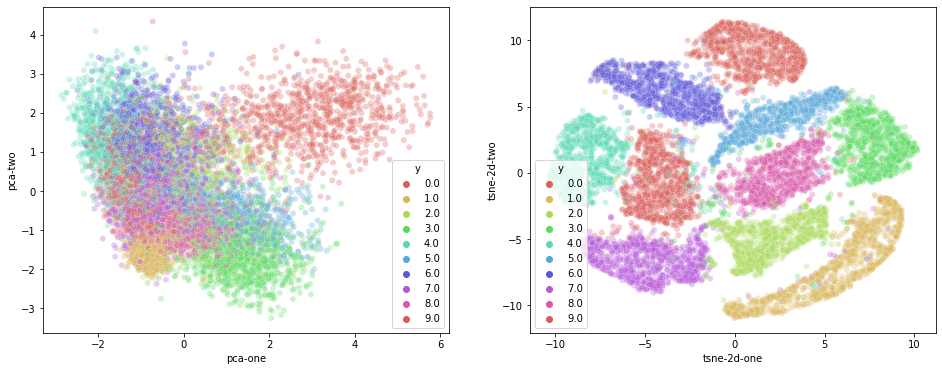

In [16]:
pca_and_tsne(512, concated_z1)

### hidden layer - a1

Explained variation per principal component: [0.224434   0.16692165]
Explained variation per principal component: [0.22504364 0.16680335]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.530s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.727476
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.423187
[t-SNE] KL divergence after 300 iterations: 2.526396
t-SNE done! Time elapsed: 13.894832134246826 seconds


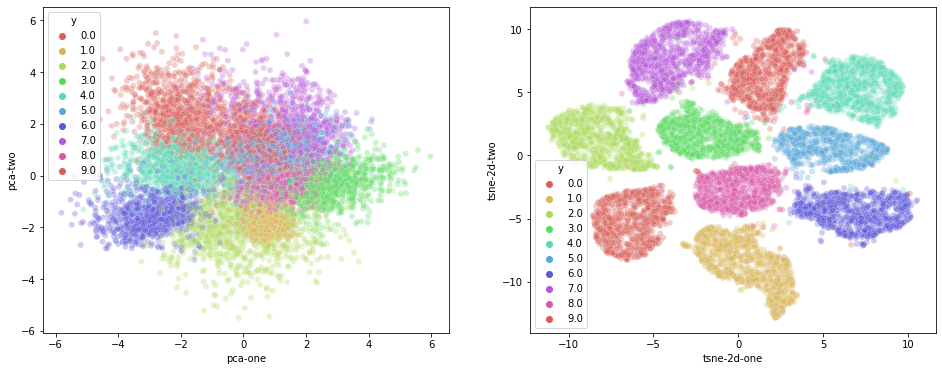

In [17]:
pca_and_tsne(256, concated_a1)

### hidden layer - z2

Explained variation per principal component: [0.21558353 0.17205882]
Explained variation per principal component: [0.21593904 0.17124152]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.594s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.608103
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.886490
[t-SNE] KL divergence after 300 iterations: 2.511142
t-SNE done! Time elapsed: 13.815019130706787 seconds


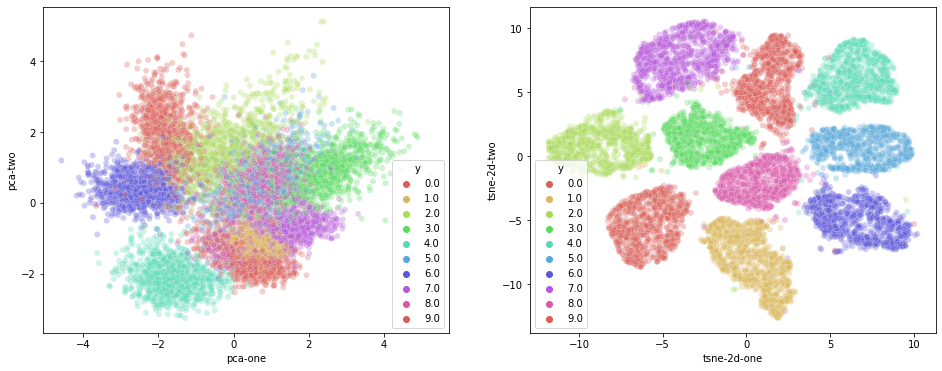

In [18]:
pca_and_tsne(256, concated_z2)

### hidden layer - a2

Explained variation per principal component: [0.29117712 0.21353604]
Explained variation per principal component: [0.29164243 0.21315601]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.479s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.802263
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.806122
[t-SNE] KL divergence after 300 iterations: 2.438952
t-SNE done! Time elapsed: 12.846948146820068 seconds


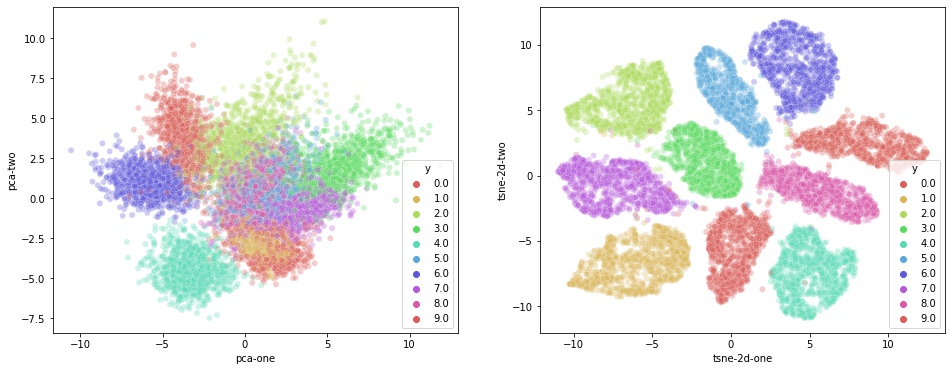

In [19]:
pca_and_tsne(128, concated_a2)

### hidden layer - z3

Explained variation per principal component: [0.2747967  0.21793939]
Explained variation per principal component: [0.27549928 0.21749532]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.637s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.732265
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.487587
[t-SNE] KL divergence after 300 iterations: 2.414424
t-SNE done! Time elapsed: 12.805452823638916 seconds


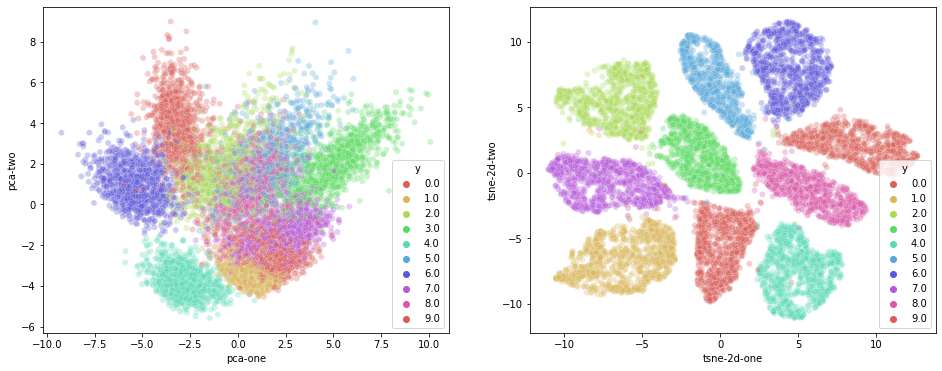

In [23]:
pca_and_tsne(128, concated_z3)

### hidden layer - a3 

Explained variation per principal component: [0.3130107  0.24598125]
Explained variation per principal component: [0.31322291 0.24629642]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.502s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.406600
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.444473
[t-SNE] KL divergence after 300 iterations: 2.403902
t-SNE done! Time elapsed: 12.916932106018066 seconds


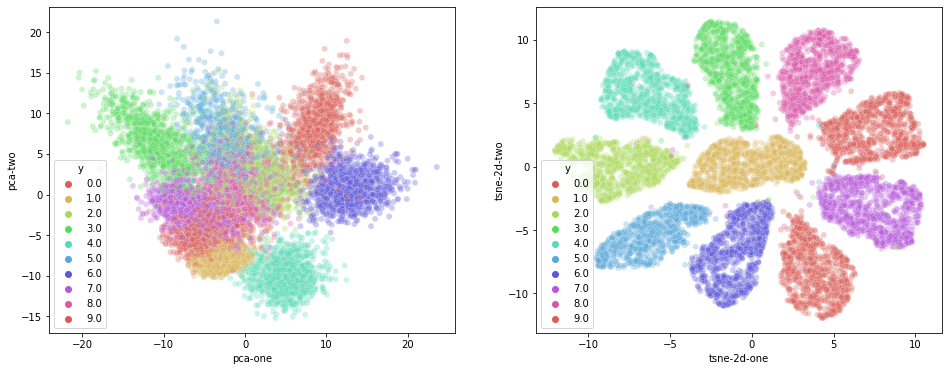

In [21]:
pca_and_tsne(64, concated_a3)

### hidden layer - z4

Explained variation per principal component: [0.30044937 0.23400062]
Explained variation per principal component: [0.30067265 0.23464562]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.567s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.233330
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.082214
[t-SNE] KL divergence after 300 iterations: 2.382306
t-SNE done! Time elapsed: 12.80972695350647 seconds


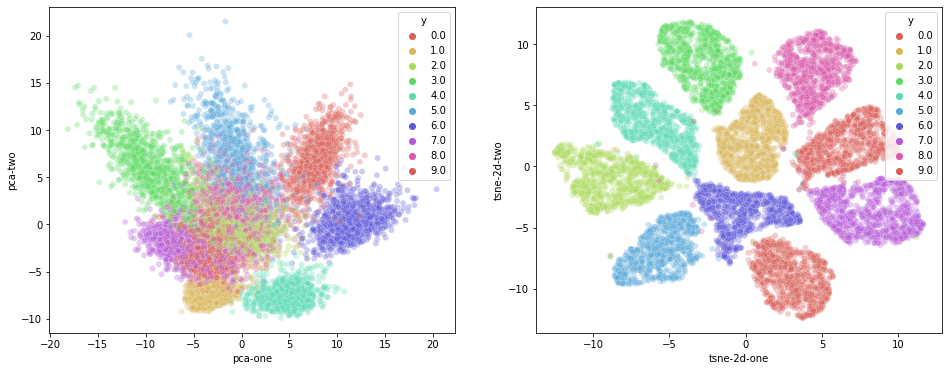

In [22]:
pca_and_tsne(64, concated_z4)

# Test dataset - Hidden layer PCA and t-SNE

In [24]:
concated_z1 = torch.empty(0, 512)
concated_a1 = torch.empty(0, 256)
concated_z2 = torch.empty(0, 256)
concated_a2 = torch.empty(0, 128)
concated_z3 = torch.empty(0, 128)
concated_a3 = torch.empty(0, 64)
concated_z4 = torch.empty(0, 64)
concated_label = torch.empty(0)

for data in test_loader:
    inputs, labels = data
    outputs, (z1, a1, z2, a2, z3, a3, z4) = model(inputs)
    
    concated_z1 = torch.cat((concated_z1, z1), 0)
    concated_a1 = torch.cat((concated_a1, a1), 0)
    concated_z2 = torch.cat((concated_z2, z2), 0)
    concated_a2 = torch.cat((concated_a2, a2), 0)
    concated_z3 = torch.cat((concated_z3, z3), 0)
    concated_a3 = torch.cat((concated_a3, a3), 0)
    concated_z4 = torch.cat((concated_z4, z4), 0)
    concated_label = torch.cat((concated_label, labels), 0)

### hidden layer - z1

Explained variation per principal component: [0.11558016 0.10643189]
Explained variation per principal component: [0.11558003 0.10643181]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.004s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.765s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.146671
[t-SNE] KL divergence after 250 iterations with early exaggeration: 79.467606
[t-SNE] KL divergence after 300 iterations: 2.619620
t-SNE done! Time elapsed: 12.508460998535156 seconds


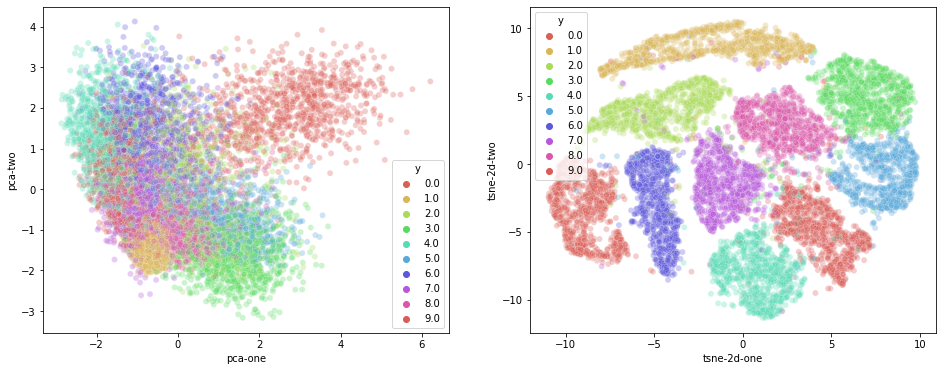

In [27]:
pca_and_tsne(512, concated_z1)

### hidden layer - a1

Explained variation per principal component: [0.23041417 0.16850902]
Explained variation per principal component: [0.23041409 0.16850871]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.367s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.732884
[t-SNE] KL divergence after 250 iterations with early exaggeration: 72.035355
[t-SNE] KL divergence after 300 iterations: 2.528681
t-SNE done! Time elapsed: 12.092345237731934 seconds


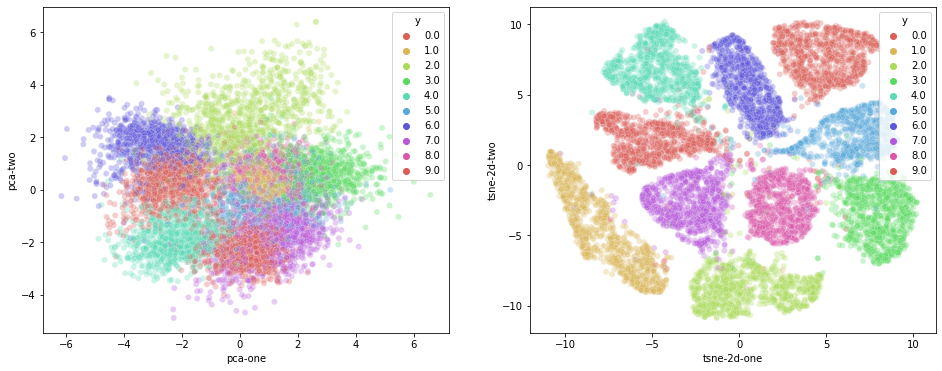

In [28]:
pca_and_tsne(256, concated_a1)

### hidden layer - z2

Explained variation per principal component: [0.2188986 0.1740001]
Explained variation per principal component: [0.21889868 0.17400047]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.002s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.363s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.612451
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.707047
[t-SNE] KL divergence after 300 iterations: 2.510997
t-SNE done! Time elapsed: 12.477168321609497 seconds


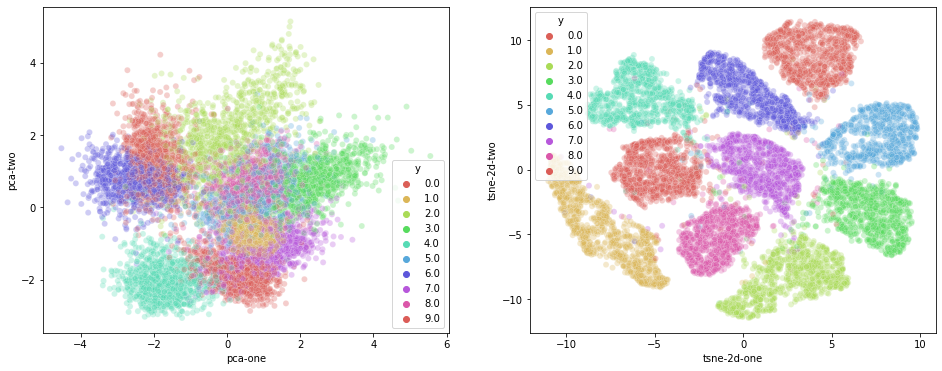

In [29]:
pca_and_tsne(256, concated_z2)

### hidden layer - a2

Explained variation per principal component: [0.2913385 0.2154852]
Explained variation per principal component: [0.29133824 0.21548472]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.366s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.807980
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.824432
[t-SNE] KL divergence after 300 iterations: 2.459639
t-SNE done! Time elapsed: 13.1026611328125 seconds


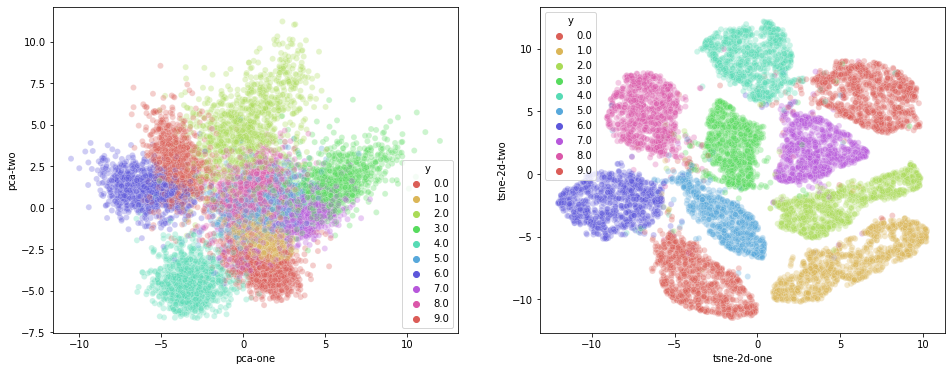

In [30]:
pca_and_tsne(128, concated_a2)

### hidden layer - z3

Explained variation per principal component: [0.2744871 0.2175963]
Explained variation per principal component: [0.27448702 0.2175963 ]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.345s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.736635
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.394562
[t-SNE] KL divergence after 300 iterations: 2.425339
t-SNE done! Time elapsed: 13.57976508140564 seconds


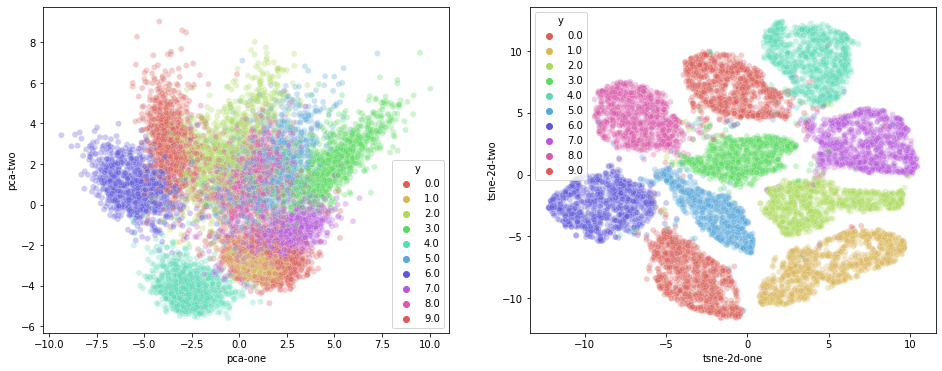

In [31]:
pca_and_tsne(128, concated_z3)

### hidden layer - a3

Explained variation per principal component: [0.3122861  0.24370258]
Explained variation per principal component: [0.31228584 0.24370256]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.282s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.413686
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.227097
[t-SNE] KL divergence after 300 iterations: 2.414005
t-SNE done! Time elapsed: 12.110589027404785 seconds


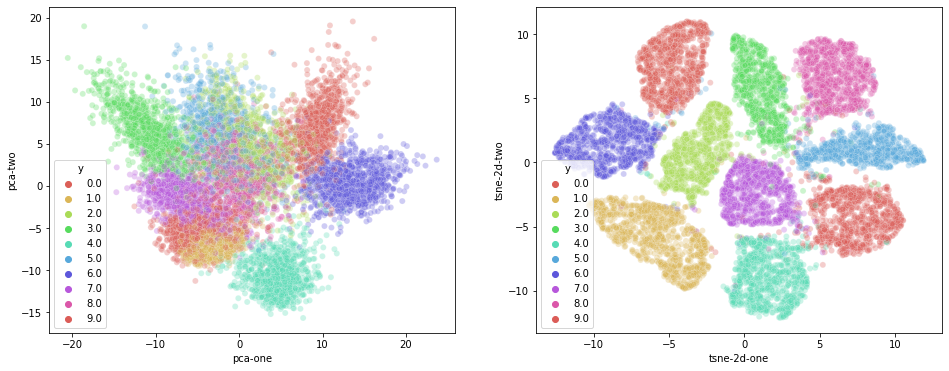

In [32]:
pca_and_tsne(64, concated_a3)

### hidden layer - z4

Explained variation per principal component: [0.2994197  0.23180714]
Explained variation per principal component: [0.29941967 0.23180717]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...


/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computed neighbors for 10000 samples in 2.233s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.240323
[t-SNE] KL divergence after 250 iterations with early exaggeration: 69.835983
[t-SNE] KL divergence after 300 iterations: 2.383730
t-SNE done! Time elapsed: 12.620272874832153 seconds


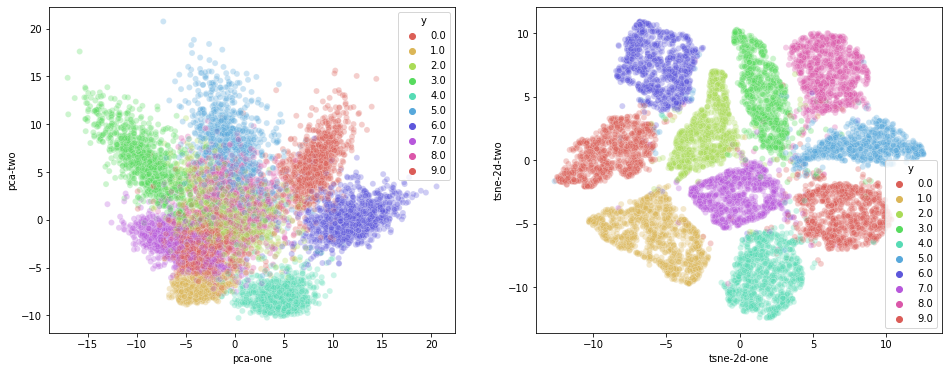

In [33]:
pca_and_tsne(64, concated_z4)